In [14]:
using Plots, GraphPlot, GraphRecipes 
using LightGraphs, SimpleWeightedGraphs, GraphIO, GraphPlot
using DataFrames, Queryverse
Epi = include("/Users/Pit/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")

Main.DigitalEpidemiology

In [ ]:
function plotabm(
    model::ABM{A,<:GraphSpace};
    ac = x -> "#765db4",
    as = length,
    am = x -> :circle,
    kwargs...,
) where {A}

    N = nodes(model)
    ncolor = Vector(undef, length(N))
    weights = zeros(length(N))
    markers = Vector(undef, length(N))
    for (i, n) in enumerate(N)
        a = get_node_agents(n, model)
        ncolor[i] = ac(a)
        weights[i] = as(a)
        markers[i] = am(a)
    end

    graphplot(
        model.space.graph,
        node_weights = weights,
        nodeshape = markers,
        nodecolor = ncolor,
        color = "black",
        markerstrokecolor = "black",
        markerstrokewidth = 1.5;
        kwargs...,
    )
end

In [15]:
user="PietroMonticone1"
# Load population data
population_data = Epi.LoadData("ProvincialPopulation", user);
# Load age-stratified population data
age_population_data = Epi.LoadData("AgeStratifiedProvincialPopulation", user); 

scale_factor=2300
provincial_pops=round.(Int, population_data.population./scale_factor) 

107-element Array{Int64,1}:
 979
  74
 160
 255
  93
 182
  55
  93
 119
 363
  95
 388
 263
   ⋮
  76
 147
 100
 148
 112
  74
  68
  68
 382
  75
 169
 151

In [16]:
# Load mobility data
mobility_data = Epi.LoadData("Flow1", user)
# Build initial mobility graph
mobility_graph = SimpleWeightedDiGraph(mobility_data[1], mobility_data[2], mobility_data[3])
# Remove the 104/5/6/7th node: provincial code doesn't exist
for i in 1:4
    rem_vertex!(mobility_graph, 104)
end

In [18]:
d = DataFrame(load("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/Geospatial/ProvincialCoordinates.csv"))
d = sort!(d, :code);

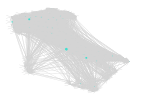

In [21]:
gplot(mobility_graph, d.x, -d.y, nodesize=provincial_pops)

In [22]:
g = mobility_graph
weight_matrix = LightGraphs.weights(g)
for i in 1:nv(g)
	weight_matrix[i,i] = 0
end

edgewidthsdict = Dict()
for node in 1:nv(g)
	nbs = neighbors(g,node)
	for nb in nbs
		edgewidthsdict[(node,nb)] = weight_matrix[node,nb] / sum([outneighbor for outneighbor in weight_matrix[node,:]])
	end
end

edgewidthsf(s,d,w) = edgewidthsdict[(s,d)]*5

plotargs = (x=d.x, y=d.y , nodeshape=:circle, nodesize=15, nodeweights=vcat(10^6,fill(0,106)), linealpha=0.4, 
			aspect_ratio = 1, size = (1000, 1000), showaxis = false)

plotargs = merge(plotargs, (edgewidth = edgewidthsf,))



(x = [377216.922481713, 438311.2075191472, 465200.1353045395, 387693.8267225758, 435743.39139901864, 473418.07522887376, 374503.74385673454, 404300.80515644135, 443302.3025166512, 509707.3419299772  …  545520.4326879303, 776254.7509246627, 667950.2378151875, 1.1868329576686297e6, 1.1237836451618343e6, 449159.4027137217, 521083.6676816487, 872453.2106423259, 1.101743219962638e6, 495220.63141497655], y = [5.000174118176652e6, 5.041479978089081e6, 5.04562819263874e6, 4.925820507902818e6, 4.969641274943878e6, 4.96391050196325e6, 5.065346148559709e6, 4.86660495753401e6, 4.903357417042556e6, 4.923818279498858e6  …  5.008788848769655e6, 4.870006266002103e6, 4.868616805075056e6, 4.366656091336188e6, 4.299573698821055e6, 5.1042192573428275e6, 5.053148299603989e6, 4.781994882649186e6, 4.582798734770944e6, 4.364316856789571e6], nodeshape = :circle, nodesize = 15, nodeweights = [1000000, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], linealpha = 0.4, aspect_ratio = 1, size = (1000, 1

In [41]:
g = mobility_graph
weight_matrix = LightGraphs.weights(g)
for i in 1:nv(g)
	weight_matrix[i,i] = 0
end

edgewidthsdict = Dict()
for node in 1:nv(g)
	nbs = neighbors(g,node)
	for nb in nbs
		edgewidthsdict[(node,nb)] = weight_matrix[node,nb] / sum([outneighbor for outneighbor in weight_matrix[node,:]])
	end
end

edgewidthsf(s,d,w) = edgewidthsdict[(s,d)]*10

plotargs = (x=d.x, y=d.y , nodeshape=:circle, nodesize=15, nodeweights=vcat(10^6,fill(0,106)), linealpha=0.4, 
			aspect_ratio = 1, size = (1000, 1000), showaxis = false)

plotargs = merge(plotargs, (edgewidth = edgewidthsf,))

graphplot(g, x=d.x, y=d.y , nodeshape=:circle, nodesize=11, nodeweights=provincial_pops, linealpha=0.4, 
			aspect_ratio = 1, size = (1000, 1000), showaxis = false, edgewidth = edgewidthsf)